<a href="https://colab.research.google.com/github/teena496/Data-Analyst-Capstone-Project/blob/main/Lab_13_Finding_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [ ]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [ ]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


In [ ]:
## Write your code here
comp_data = df['ConvertedCompYearly'].dropna()


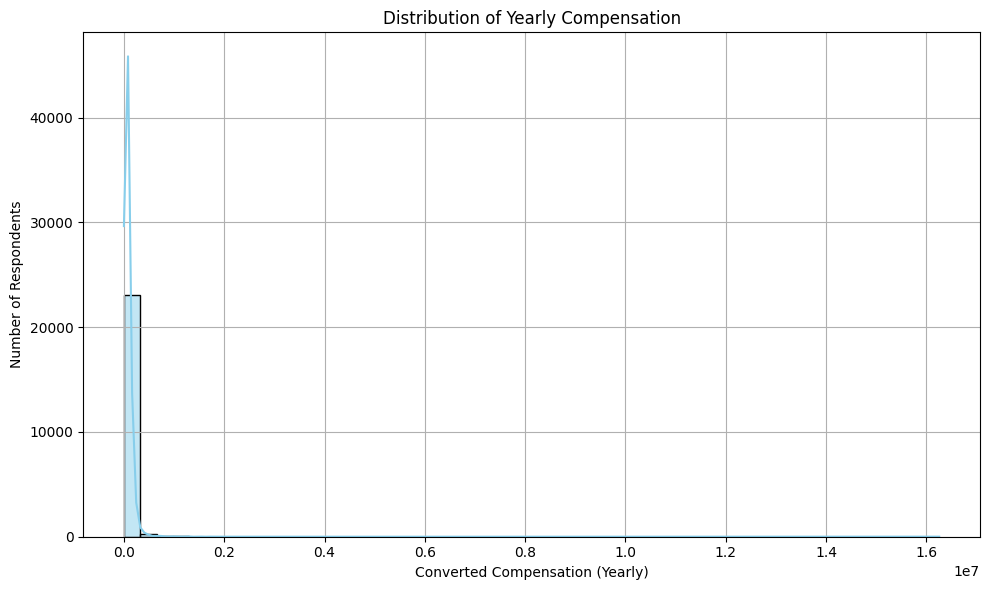

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(comp_data, bins=50, kde=True, color='skyblue')

plt.title('Distribution of Yearly Compensation')
plt.xlabel('Converted Compensation (Yearly)')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.tight_layout()
plt.show()


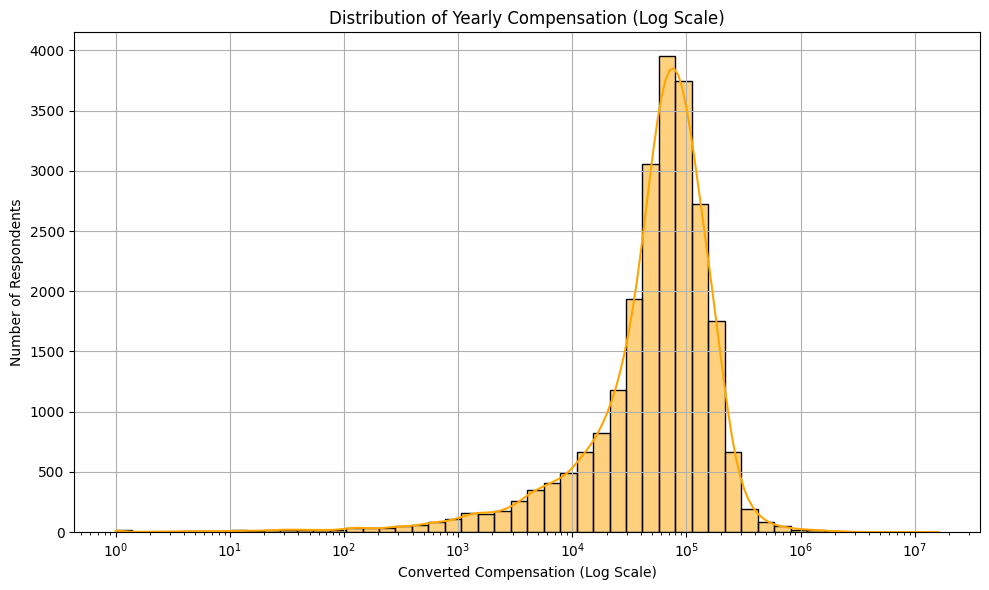

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(comp_data, bins=50, kde=True, color='orange', log_scale=(True, False))

plt.title('Distribution of Yearly Compensation (Log Scale)')
plt.xlabel('Converted Compensation (Log Scale)')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.tight_layout()
plt.show()


<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [ ]:
## Write your code here
# Filter rows where Employment status is exactly "Employed, full-time"
full_time_df = df[df['Employment'] == 'Employed, full-time']


In [ ]:
full_time_df = df[df['Employment'].str.contains('Employed, full-time', na=False)]


In [ ]:
median_full_time_comp = full_time_df['ConvertedCompYearly'].median()
print(f"Median Yearly Compensation (Full-Time): {median_full_time_comp:,.2f}")


Median Yearly Compensation (Full-Time): 67,666.00


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



In [ ]:
## Write your code here
# Filter necessary columns and drop missing values
comp_by_country = df[['Country', 'ConvertedCompYearly']].dropna()


In [ ]:
# Get top 10 countries by response count
top_countries = comp_by_country['Country'].value_counts().nlargest(10).index

# Filter the data for those countries
comp_by_country = comp_by_country[comp_by_country['Country'].isin(top_countries)]


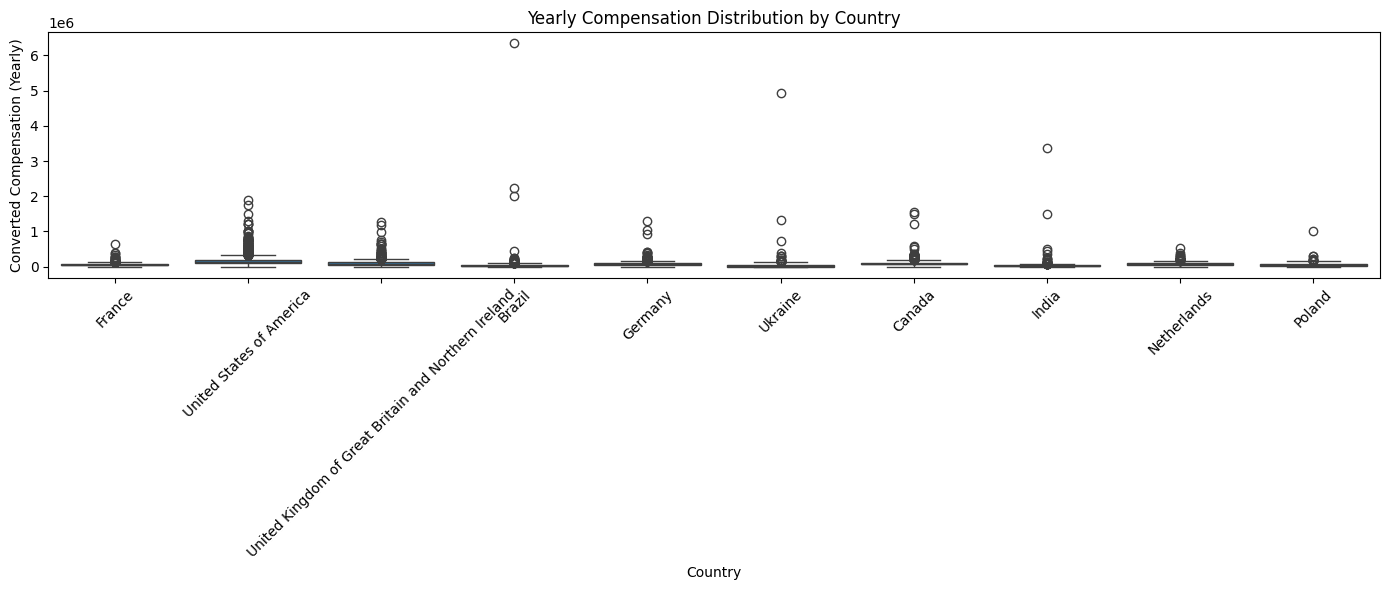

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.boxplot(data=comp_by_country, x='Country', y='ConvertedCompYearly')

plt.title('Yearly Compensation Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Converted Compensation (Yearly)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


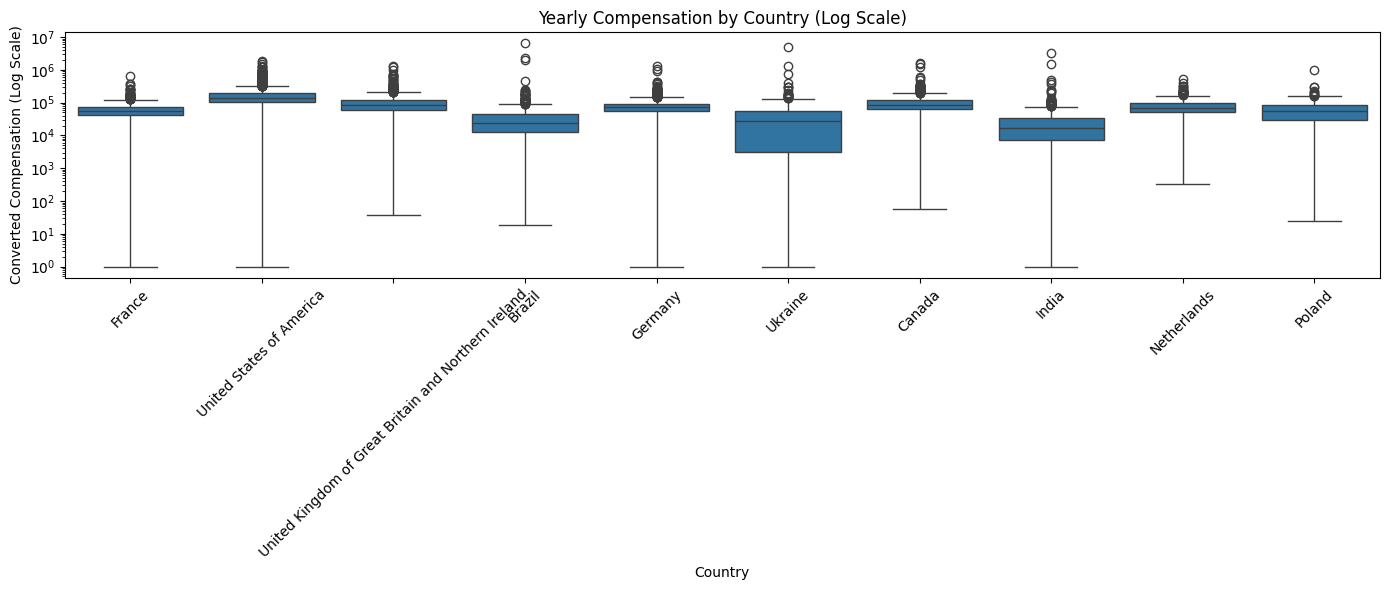

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=comp_by_country, x='Country', y='ConvertedCompYearly')
plt.yscale('log')  # Log scale helps reduce skew impact
plt.title('Yearly Compensation by Country (Log Scale)')
plt.xlabel('Country')
plt.ylabel('Converted Compensation (Log Scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [ ]:
## Write your code here
# Drop missing values for calculation
comp_data = df['ConvertedCompYearly'].dropna()

Q1 = comp_data.quantile(0.25)
Q3 = comp_data.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [ ]:
# Create a new DataFrame excluding outliers
df_refined = df[(df['ConvertedCompYearly'] >= lower_bound) &
                (df['ConvertedCompYearly'] <= upper_bound)]


In [ ]:
print(f"Original dataset: {df.shape[0]} rows")
print(f"Refined dataset (without outliers): {df_refined.shape[0]} rows")
print(f"Outliers removed: {df.shape[0] - df_refined.shape[0]}")


Original dataset: 65437 rows
Refined dataset (without outliers): 22457 rows
Outliers removed: 42980


In [ ]:
df_refined.reset_index(drop=True, inplace=True)


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


In [ ]:
## Write your code here
# Convert WorkExp if it's not numeric (optional)
df_refined['WorkExp'] = pd.to_numeric(df_refined['WorkExp'], errors='coerce')

# Drop rows with NaNs in any of the 3 columns
corr_df = df_refined[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].dropna()


/tmp/ipykernel_1994/87666656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_refined['WorkExp'] = pd.to_numeric(df_refined['WorkExp'], errors='coerce')


In [ ]:
correlation_matrix = corr_df.corr()
print(correlation_matrix)


                     ConvertedCompYearly   WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.406993       -0.059643
WorkExp                         0.406993  1.000000       -0.032388
JobSatPoints_1                 -0.059643 -0.032388        1.000000


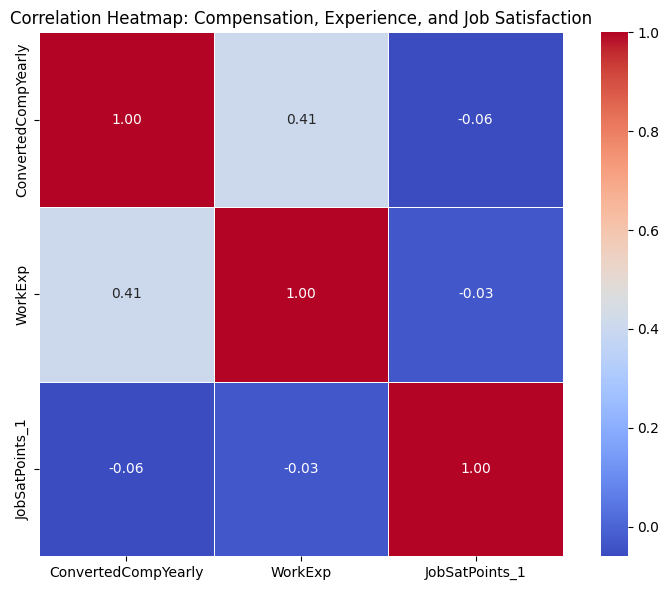

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap: Compensation, Experience, and Job Satisfaction')
plt.tight_layout()
plt.show()


<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


In [ ]:
## Write your code here
# Drop rows with missing values in the required columns
scatter_df = df_refined[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].dropna()


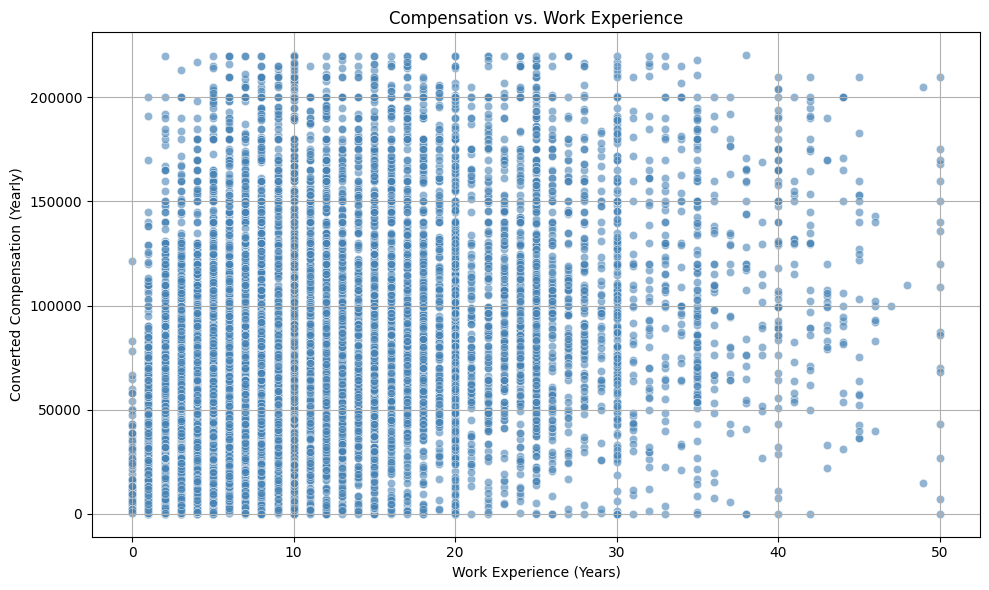

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=scatter_df, x='WorkExp', y='ConvertedCompYearly', alpha=0.6, color='steelblue')
plt.title('Compensation vs. Work Experience')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Converted Compensation (Yearly)')
plt.grid(True)
plt.tight_layout()
plt.show()


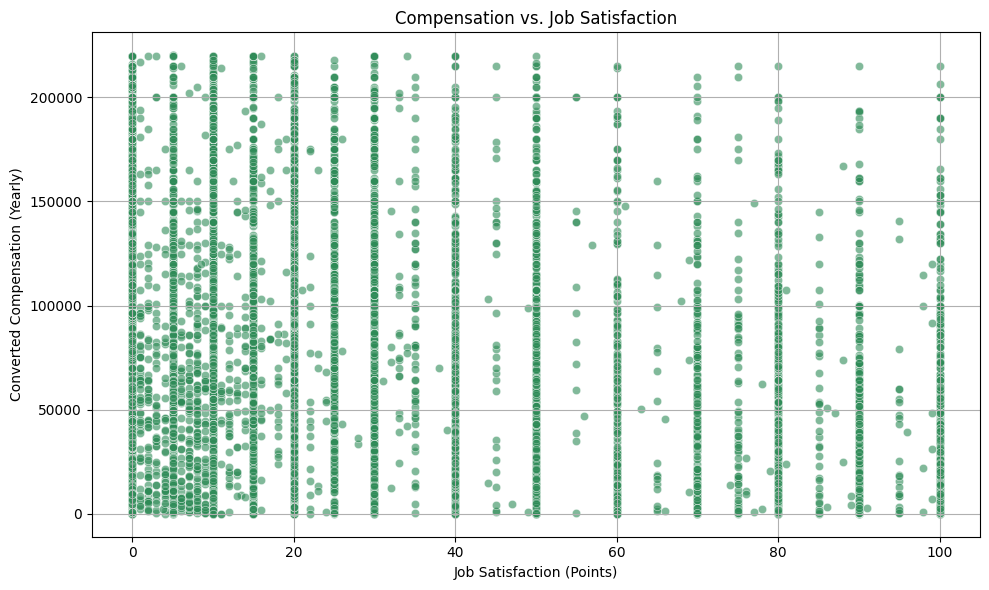

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scatter_df, x='JobSatPoints_1', y='ConvertedCompYearly', alpha=0.6, color='seagreen')
plt.title('Compensation vs. Job Satisfaction')
plt.xlabel('Job Satisfaction (Points)')
plt.ylabel('Converted Compensation (Yearly)')
plt.grid(True)
plt.tight_layout()
plt.show()


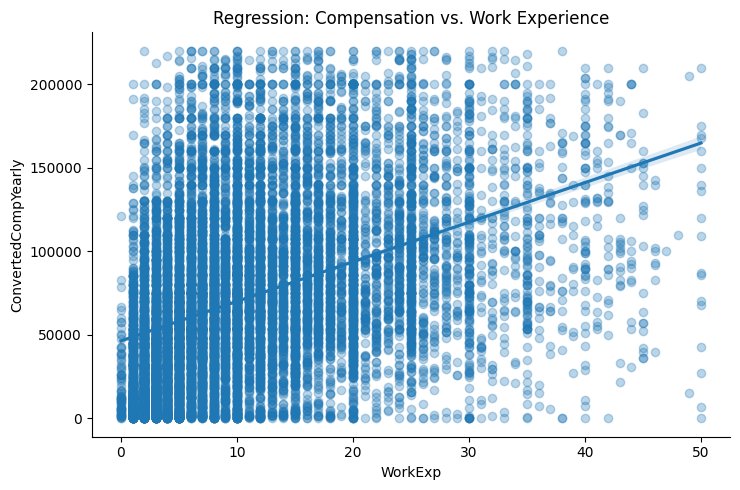

In [ ]:
sns.lmplot(data=scatter_df, x='WorkExp', y='ConvertedCompYearly', aspect=1.5, scatter_kws={'alpha':0.3})
plt.title('Regression: Compensation vs. Work Experience')
plt.tight_layout()
plt.show()


<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
